# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | surbo
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | viedma
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | reggane
Processing Record 8 of Set 1 | luanda
Processing Record 9 of Set 1 | prado
Processing Record 10 of Set 1 | maceio
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | mandan
Processing Record 16 of Set 1 | kone
Processing Record 17 of Set 1 | tubmanburg
Processing Record 18 of Set 1 | bontang
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | mount gambier
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,surbo,40.3994,18.1331,23.34,68,1,5.68,IT,1685210577
1,haiku-pauwela,20.9219,-156.3051,24.47,74,21,1.34,US,1685210577
2,stanley,54.8680,-1.6985,18.77,60,20,5.14,GB,1685210577
3,viedma,-40.8135,-62.9967,11.71,28,0,6.92,AR,1685210438
4,tolanaro,-25.0319,46.9987,23.04,94,75,5.14,MG,1685210578


In [9]:
import os

directory = 'output_data'
if not os.path.exists(directory):
    os.makedirs(directory)


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,surbo,40.3994,18.1331,23.34,68,1,5.68,IT,1685210577
1,haiku-pauwela,20.9219,-156.3051,24.47,74,21,1.34,US,1685210577
2,stanley,54.8680,-1.6985,18.77,60,20,5.14,GB,1685210577
3,viedma,-40.8135,-62.9967,11.71,28,0,6.92,AR,1685210438
4,tolanaro,-25.0319,46.9987,23.04,94,75,5.14,MG,1685210578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

**Discussion about the linear relationship:** YOUR RESPONSE HERE

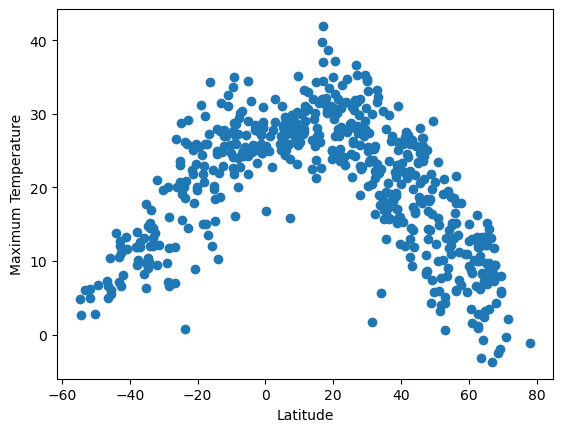

In [53]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

## Convert to floats and store as x and y values
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")

# Run linear regression
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')


# Save the figure
plt.savefig("output_data/Fig1.png")
plt.savefig()
# Show plot
plt.show()

#### Latitude Vs. Humidity

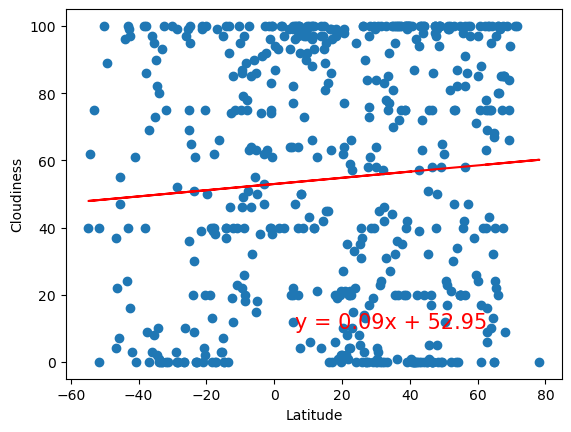

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE


## Convert to floats and store as x and y values
# x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

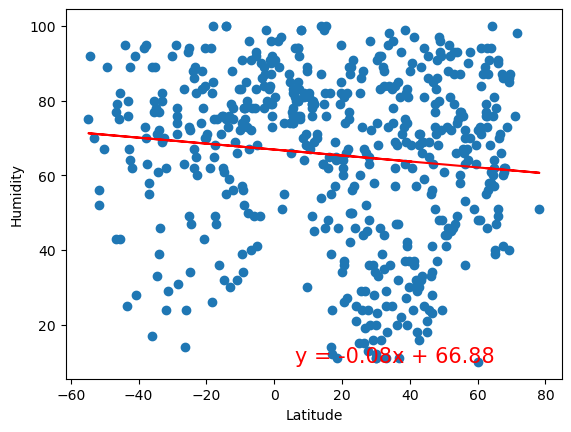

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

## Convert to floats and store as x and y values
# x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

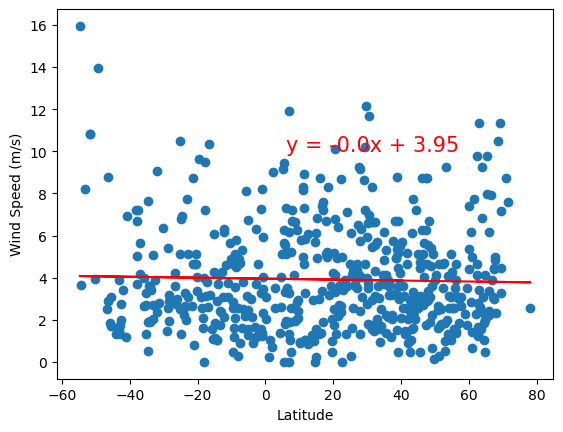

In [19]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

## Convert to floats and store as x and y values
# x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
city_data_df.loc[city_data_df["Lat"]>=0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,surbo,40.3994,18.1331,23.34,68,1,5.68,IT,1685210577
1,haiku-pauwela,20.9219,-156.3051,24.47,74,21,1.34,US,1685210577
2,stanley,54.8680,-1.6985,18.77,60,20,5.14,GB,1685210577
5,isafjordur,66.0755,-23.1240,9.02,49,20,6.17,IS,1685210578
6,reggane,26.7158,0.1714,36.59,19,90,4.57,DZ,1685210578
...,...,...,...,...,...,...,...,...,...
544,kotel'nikovo,47.6317,43.1461,18.40,83,97,2.88,RU,1685210830
546,el reno,35.5323,-97.9550,27.89,57,20,4.12,US,1685210832
547,shingu,33.7333,135.9833,17.65,84,92,0.93,JP,1685210833


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,surbo,40.3994,18.1331,23.34,68,1,5.68,IT,1685210577
1,haiku-pauwela,20.9219,-156.3051,24.47,74,21,1.34,US,1685210577
2,stanley,54.8680,-1.6985,18.77,60,20,5.14,GB,1685210577
5,isafjordur,66.0755,-23.1240,9.02,49,20,6.17,IS,1685210578
6,reggane,26.7158,0.1714,36.59,19,90,4.57,DZ,1685210578


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,viedma,-40.8135,-62.9967,11.71,28,0,6.92,AR,1685210438
4,tolanaro,-25.0319,46.9987,23.04,94,75,5.14,MG,1685210578
7,luanda,-8.8368,13.2343,26.00,78,40,5.14,AO,1685210359
8,prado,-17.3411,-39.2208,25.86,68,38,3.81,BR,1685210578
9,maceio,-9.6658,-35.7353,27.69,83,75,4.63,BR,1685210408


###  Temperature vs. Latitude Linear Regression Plot

In [35]:
# Define a function to create Linear Regression plots
def lr_plot(x_values, y_values, y_label, location):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

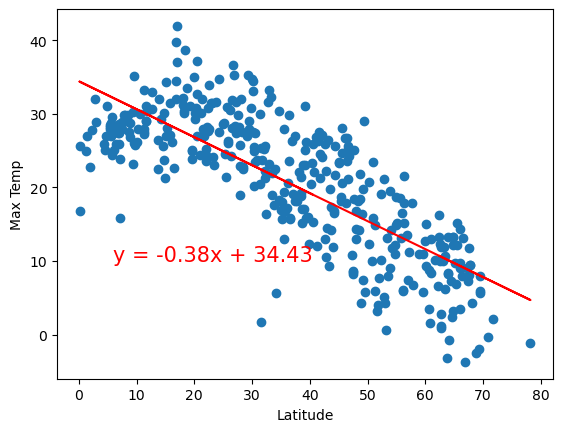

In [36]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

## Convert to floats and store as x and y values
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Max Temp',(6,10))



# Save the figure
# plt.savefig("output_data/Fig4.png")




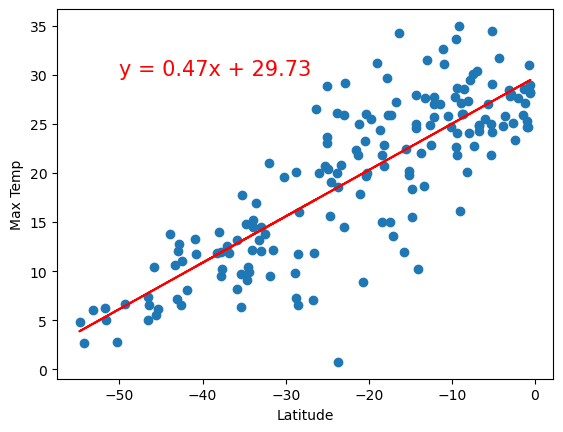

In [38]:
# Linear regression on Southern Hemisphere
## Convert to floats and store as x and y values
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Max Temp',(-50, 30))


**Discussion about the linear relationship:**  Increasing latititude correlates with increasing temperature in the southern hemisphere. Increasing latititude correlates with decreasing temperature in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

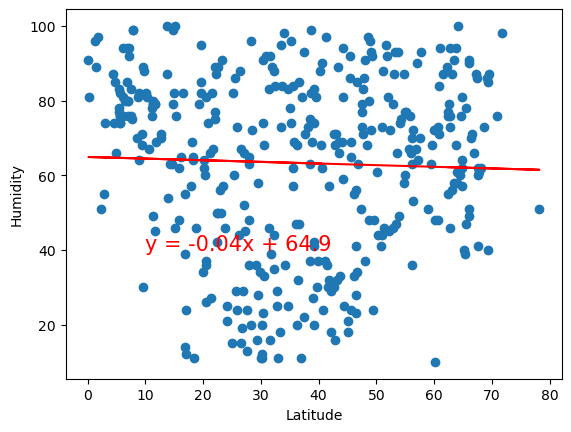

In [40]:
# Northern Hemisphere
## Convert to floats and store as x and y values
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Humidity',(10, 40))


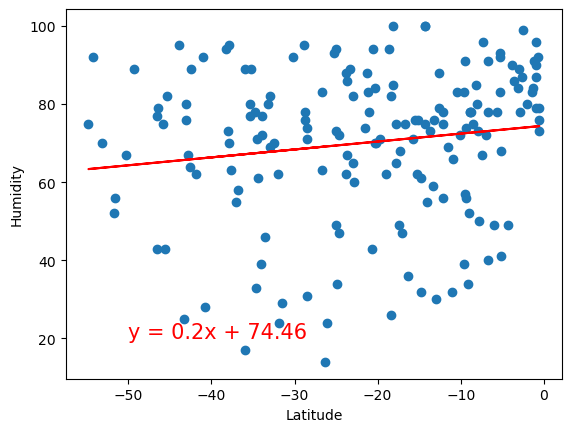

In [46]:
# Southern Hemisphere
## Convert to floats and store as x and y values
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Humidity',(-50, 20))


**Discussion about the linear relationship:** Increasing latititude correlates with increasing humidity in the southern hemisphere. Increasing latititude correlates with decreasing humidity in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

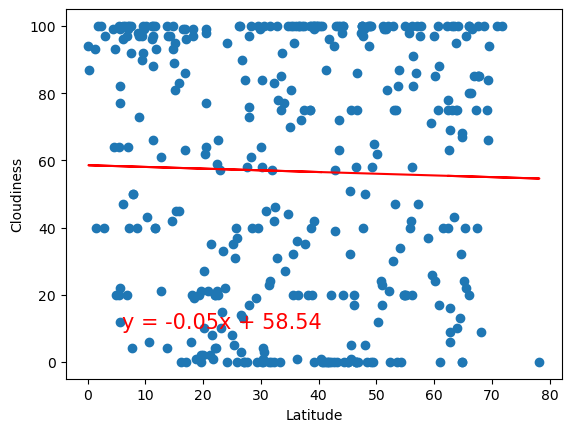

In [47]:
# Northern Hemisphere
## Convert to floats and store as x and y values
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Cloudiness',(6,10))


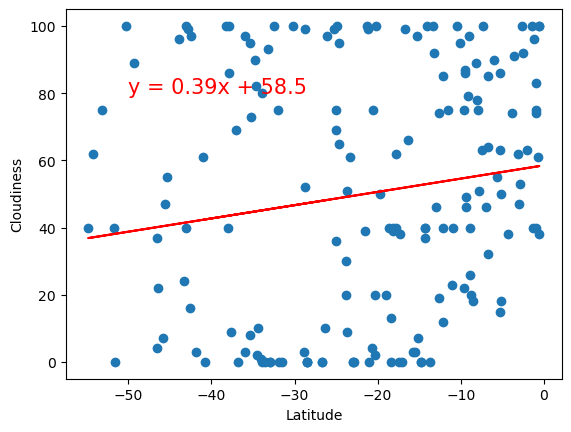

In [49]:
# Southern Hemisphere
## Convert to floats and store as x and y values
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Cloudiness',(-50,80))

**Discussion about the linear relationship:**  Increasing latititude correlates with increasing cloudiness in the southern hemisphere. Increasing latititude correlates with decreasing cloudiness in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

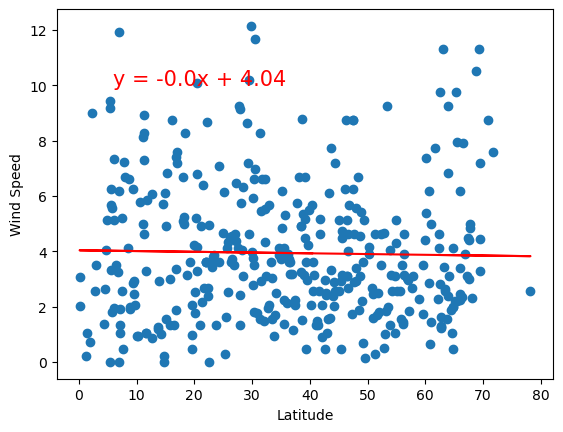

In [50]:
# Northern Hemisphere
## Convert to floats and store as x and y values
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Wind Speed',(6,10))

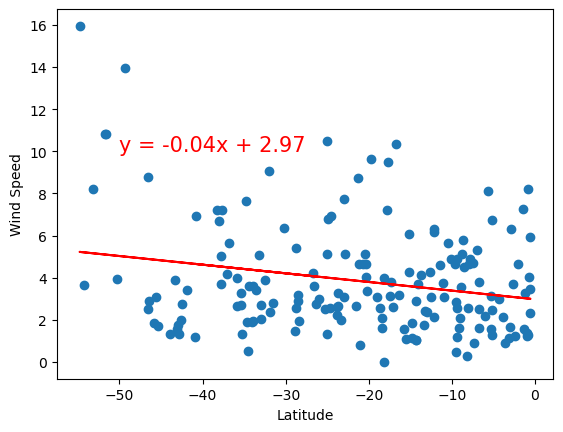

In [51]:
# Southern Hemisphere
## Convert to floats and store as x and y values
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

# Run linear regression
lr_plot(x_values, y_values, 'Wind Speed',(-50,10))

**Discussion about the linear relationship:** Increasing latititude correlates with decreasing wind speed significantly in the southern hemisphere, and but has very little if any effect in the northern hemisphere. 